In [ ]:
# Importing libraries for data handling, visualization, and suppressing warnings
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder

In [ ]:
cad_df = pd.read_csv('Z-Alizadeh sani dataset.csv')
cad_df

,Age,Weight,Length,Sex,BMI,DM,HTN,Current Smoker,EX-Smoker,FH,...,K,Na,WBC,Lymph,Neut,PLT,EF-TTE,Region RWMA,VHD,Cath
0,53,90,175,Male,29.387755,0,1,1,0,0,...,4.7,141,5700,39,52,261,50,0,N,Cad
1,67,70,157,Fmale,28.398718,0,1,0,0,0,...,4.7,156,7700,38,55,165,40,4,N,Cad
2,54,54,164,Male,20.077335,0,0,1,0,0,...,4.7,139,7400,38,60,230,40,2,mild,Cad
3,66,67,158,Fmale,26.838648,0,1,0,0,0,...,4.4,142,13000,18,72,742,55,0,Severe,Normal
4,50,87,153,Fmale,37.165193,0,1,0,0,0,...,4.0,140,9200,55,39,274,50,0,Severe,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,58,84,168,Male,29.761905,0,0,0,0,0,...,4.8,146,8500,34,58,251,45,0,N,Cad
299,55,64,152,Fmale,27.700831,0,0,0,0,0,...,4.0,139,11400,16,80,377,40,0,mild,Normal
300,48,77,160,Fmale,30.078125,0,1,0,0,1,...,4.0,140,9000,35,55,279,55,0,N,Normal
301,57,90,159,Fmale,35.599858,1,0,0,0,0,...,3.8,141,3800,48,40,208,55,0,N,Normal


In [ ]:
cad_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 56 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Age                    303 non-null    int64  
 1   Weight                 303 non-null    int64  
 2   Length                 303 non-null    int64  
 3   Sex                    303 non-null    object 
 4   BMI                    303 non-null    float64
 5   DM                     303 non-null    int64  
 6   HTN                    303 non-null    int64  
 7   Current Smoker         303 non-null    int64  
 8   EX-Smoker              303 non-null    int64  
 9   FH                     303 non-null    int64  
 10  Obesity                303 non-null    object 
 11  CRF                    303 non-null    object 
 12  CVA                    303 non-null    object 
 13  Airway disease         303 non-null    object 
 14  Thyroid Disease        303 non-null    object 
 15  CHF   

In [ ]:
cad_df.nunique()

,0
Age,46
Weight,54
Length,44
Sex,2
BMI,263
DM,2
HTN,2
Current Smoker,2
EX-Smoker,2
FH,2


Since the Exertional CP column has just one unique value ('N' for "No") for all 303 patient records, it can be safely removed.

In [ ]:
print("\nTarget variable with categories:\n", cad_df['Cath'].value_counts())


Target variable with categories:
 Cath
Cad       216
Normal     87
Name: count, dtype: int64


Diameter narrowing of 50% or more classifies a patient with CAD; otherwise, the patient is considered normal. There are 216 patients with CAD and 87 normal cases.

# *Data cleaning*

In [ ]:
# Checking for any NaN in the data
print("\nNumber of rows with missing values:\n", cad_df.isnull().sum().sum())

# Checking for duplicate rows
duplicates = cad_df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")


Number of rows with missing values:
 0
Number of duplicate rows: 0


There are no duplicate rows or missing values in the data.

In [ ]:
cad_df.drop(columns=['Exertional CP'], inplace=True)
cad_df.shape

(303, 55)

# *Statistical Summary and Heat Map Analysis*

In [ ]:
cad_df.describe() # Statistical summary

,Age,Weight,Length,BMI,DM,HTN,Current Smoker,EX-Smoker,FH,BP,...,ESR,HB,K,Na,WBC,Lymph,Neut,PLT,EF-TTE,Region RWMA
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,...,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,58.897690,73.831683,164.716172,27.248339,0.297030,0.590759,0.207921,0.033003,0.158416,129.554455,...,19.462046,13.153465,4.230693,140.996700,7562.046205,32.399340,60.148515,221.488449,47.231023,0.620462
std,10.392278,11.987358,9.327661,4.098865,0.457706,0.492507,0.406491,0.178941,0.365734,18.938105,...,15.936475,1.610452,0.458202,3.807885,2413.739323,9.972592,10.182493,60.796199,8.927194,1.132531
min,30.000000,48.000000,140.000000,18.115413,0.000000,0.000000,0.000000,0.000000,0.000000,90.000000,...,1.000000,8.900000,3.000000,128.000000,3700.000000,7.000000,32.000000,25.000000,15.000000,0.000000
25%,51.000000,65.000000,158.000000,24.514380,0.000000,0.000000,0.000000,0.000000,0.000000,120.000000,...,9.000000,12.200000,3.900000,139.000000,5800.000000,26.000000,52.500000,183.500000,45.000000,0.000000
50%,58.000000,74.000000,165.000000,26.775510,0.000000,1.000000,0.000000,0.000000,0.000000,130.000000,...,15.000000,13.200000,4.200000,141.000000,7100.000000,32.000000,60.000000,210.000000,50.000000,0.000000
75%,66.000000,81.000000,171.000000,29.411765,1.000000,1.000000,0.000000,0.000000,0.000000,140.000000,...,26.000000,14.200000,4.500000,143.000000,8800.000000,39.000000,67.000000,250.000000,55.000000,1.000000
max,86.000000,120.000000,188.000000,40.900658,1.000000,1.000000,1.000000,1.000000,1.000000,190.000000,...,90.000000,17.600000,6.600000,156.000000,18000.000000,60.000000,89.000000,742.000000,60.000000,4.000000


The statistical summary of the data tells the following:

1. Count: It shows that each feature in the data has 303 non-null entries.
2. Mean: It shows the average value of the column. For example: the average age in the data is ~58.9 years.
3. std (Standard Deviation): It measures how much the values vary from the mean. In other words higher std means more spreadout. For example: WBC (white blood cell(cells/ml)) has a standard deviation of ~2414 which is high.
4. min (minimum): It shows the smallest value in each column
5. max (maximum): It shows the largest value in each column
6. 25th Percentile (25%): It shows the value in which 25% of the data falls in each column. This helps to understand the lower range of data in each column
7. Median (50%): It shows the middle value when all values are sorted. Which means from the value sorted here half the data will be above, and half will be below. For example: Median age is 58.
8. 75th Percentile (75%): It shows the value in which 75% of the data falls in each column. For example: 75% of patients are younger than 66 years. This helps to understand the upper range of data in each column

# *Data Visualization*

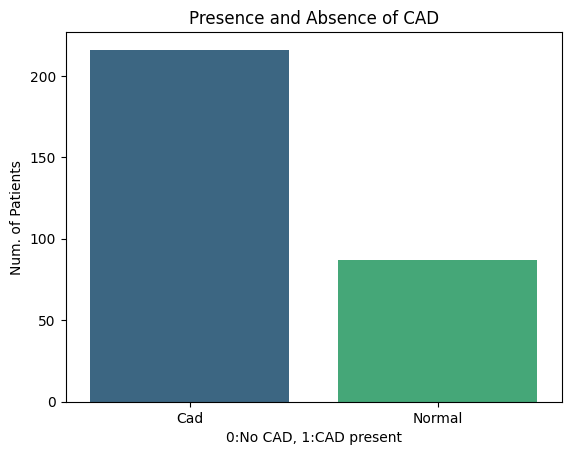

In [ ]:
# Count Plot: Cath (Target variable)
sns.countplot(data=cad_df, palette='viridis', x='Cath')
plt.title('Presence and Absence of CAD')
plt.ylabel('Num. of Patients')
plt.xlabel('0:No CAD, 1:CAD present')
plt.show()

Out of 303 patients, 216 are diagnosed with CAD, while 87 are normal, indicating a higher prevalence of CAD in the dataset.

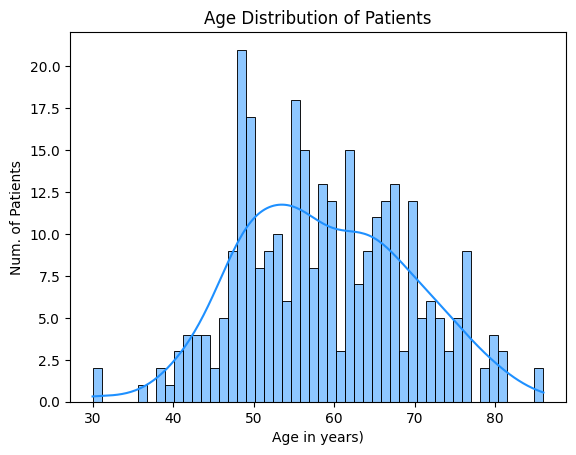

In [ ]:
# Histogram: Age distribution
sns.histplot(cad_df['Age'], bins=50, color='dodgerblue', kde=True)
plt.title('Age Distribution of Patients')
plt.xlabel('Age in years)')
plt.ylabel('Num. of Patients')
plt.show()

According to the histogram, most patients are between 45 and 70 years old, with a peak around 50–55. Fewer patients are younger than 40 or older than 80.

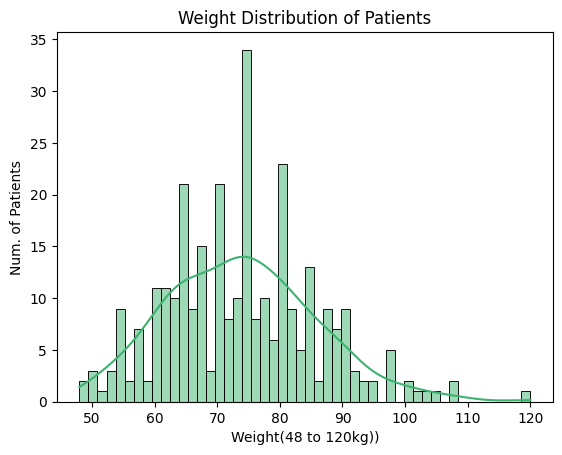

In [ ]:
# Histogram: Weight distribution
sns.histplot(cad_df['Weight'], bins=50, color='mediumseagreen', kde=True)
plt.title('Weight Distribution of Patients')
plt.xlabel('Weight(48 to 120kg))')
plt.ylabel('Num. of Patients')
plt.show()

The weight distribution of patients ranges from 48 kg to 120 kg, with most patients concentrated between 65 kg and 85 kg, showing a slightly right-skewed curve.

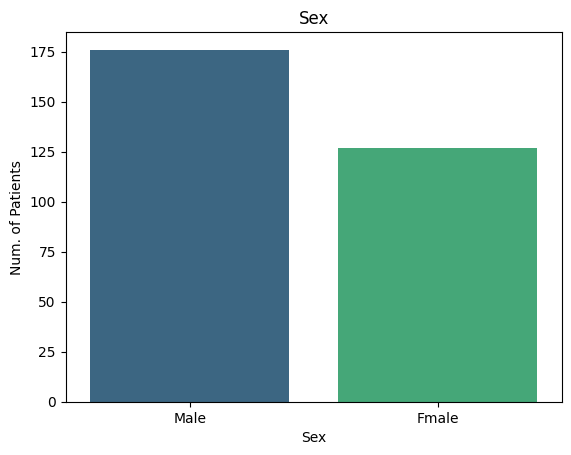

In [ ]:
# Count plot: Sex
sns.countplot(data=cad_df, x='Sex', palette='viridis')
plt.title('Sex')
plt.xlabel('Sex')
plt.ylabel('Num. of Patients')
plt.show()

The dataset has more male patients than female patients, as shown by the count plot.

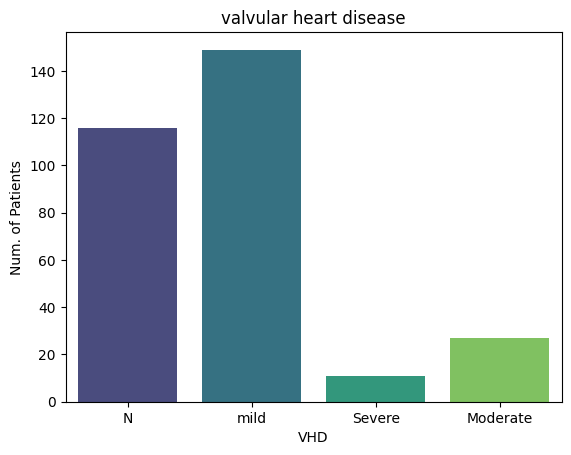

In [ ]:
# Count plot: VHD (valvular heart disease) Normal, mild, moderate, severe
sns.countplot(data=cad_df, x='VHD', palette='viridis')
plt.title('valvular heart disease')
plt.xlabel('VHD')
plt.ylabel('Num. of Patients')
plt.show()

The count plot for Valvular Heart Disease (VHD) shows that most patients have mild conditions, followed by normal cases, then moderate, and the least number of patients have severe VHD.

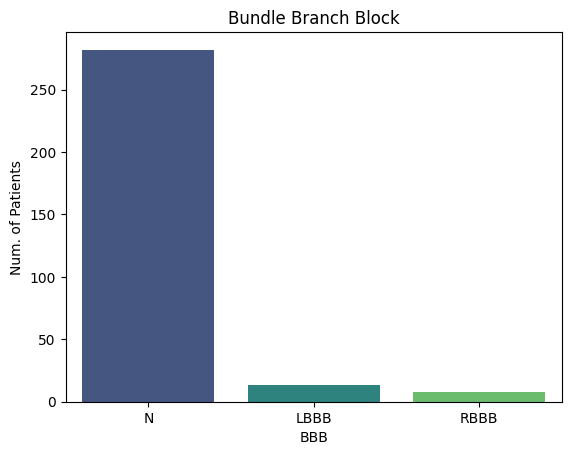

In [ ]:
# Count plot: Bundle Branch Block (Normal, Right Bundle Branch Block (RBBB),Left Bundle Branch Block (LBBB))
sns.countplot(data=cad_df, x='BBB', palette='viridis')
plt.title('Bundle Branch Block')
plt.xlabel('BBB')
plt.ylabel('Num. of Patients')
plt.show()

The majority of patients (282) have normal bundle branch conduction. Left Bundle Branch Block (LBBB) is observed in 13 patients, while Right Bundle Branch Block (RBBB) is found in only 8 patients.

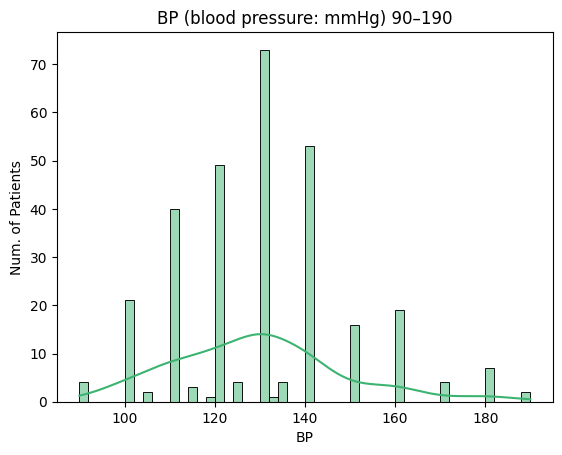

In [ ]:
# Histogram:BP (blood pressure: mmHg) 90–190
sns.histplot(cad_df['BP'], bins=50, color='mediumseagreen', kde=True)
plt.title('BP (blood pressure: mmHg) 90–190')
plt.xlabel('BP')
plt.ylabel('Num. of Patients')
plt.show()

The histogram shows that most patients have blood pressure around 130 mmHg

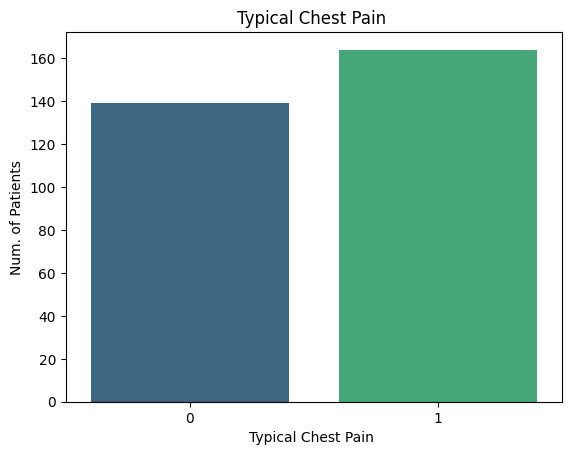

In [ ]:
# Count plot: Typical Chest Pain
sns.countplot(data=cad_df, x='Typical Chest Pain', palette='viridis')
plt.title('Typical Chest Pain ')
plt.xlabel('Typical Chest Pain ')
plt.ylabel('Num. of Patients')
plt.show()

1 is higher than 0 which indicates a greater presence of typical chest pain in the dataset.

Encoding the categorical variables in to numerical variables

In [ ]:
le = LabelEncoder()
for columns in cad_df.select_dtypes(include='object'):
    cad_df[columns] = le.fit_transform(cad_df[columns])

In [ ]:
cad_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 55 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Age                    303 non-null    int64  
 1   Weight                 303 non-null    int64  
 2   Length                 303 non-null    int64  
 3   Sex                    303 non-null    int64  
 4   BMI                    303 non-null    float64
 5   DM                     303 non-null    int64  
 6   HTN                    303 non-null    int64  
 7   Current Smoker         303 non-null    int64  
 8   EX-Smoker              303 non-null    int64  
 9   FH                     303 non-null    int64  
 10  Obesity                303 non-null    int64  
 11  CRF                    303 non-null    int64  
 12  CVA                    303 non-null    int64  
 13  Airway disease         303 non-null    int64  
 14  Thyroid Disease        303 non-null    int64  
 15  CHF   

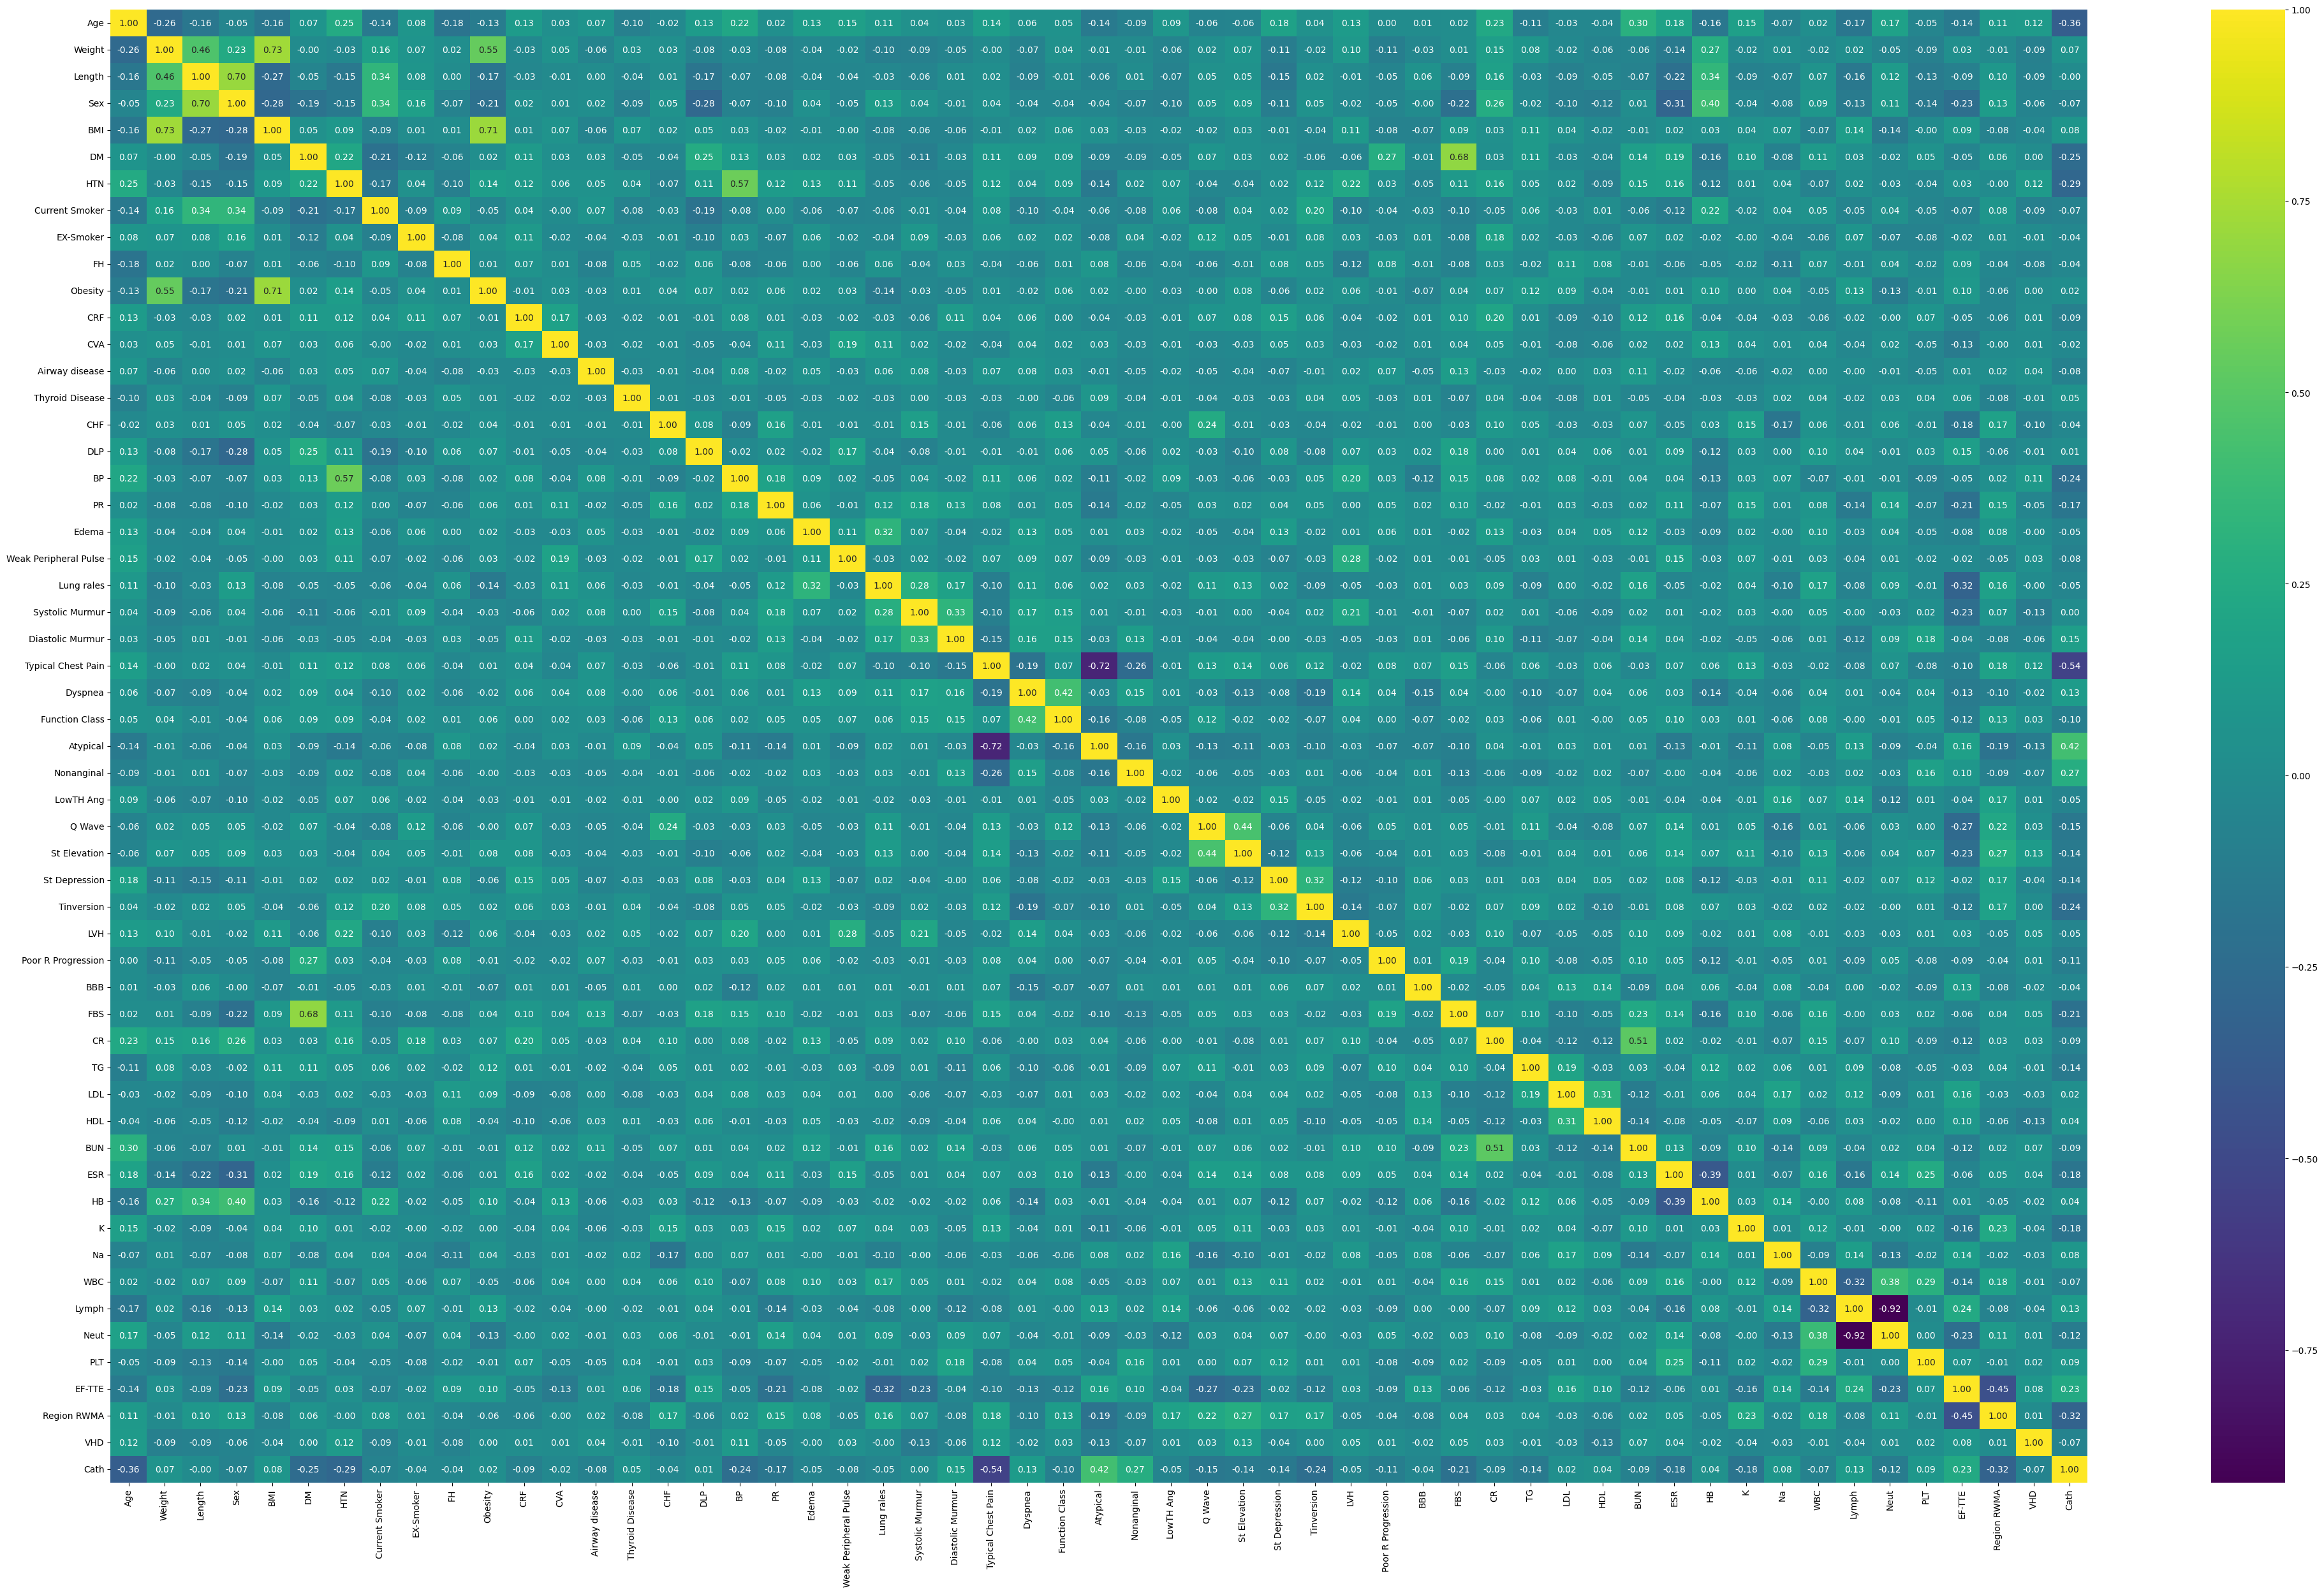

In [ ]:
plt.figure(figsize=(50, 30))
sns.heatmap(cad_df.corr(), annot=True, fmt=".2f", cmap='viridis')
plt.show()

Several features show strong positive correlations, such as:

Weight and BMI (0.73)

Length and Sex (0.70)

Obesity and BMI (0.71)

Weight and Obesity (0.55)

FBS and DM (0.68)

BP and HTN (0.57)

On the other hand, strong negative correlations include:

Lymph and Neutrophils (-0.92)

Typical Chest Pain and Atypical (-0.72)

Regarding the target variable Cath:

Typical Chest Pain has the strongest negative correlation with the target (-0.52) and the Atypical feature has the strongest positive correlation with the target (0.42).

In [ ]:
cad_df

,Age,Weight,Length,Sex,BMI,DM,HTN,Current Smoker,EX-Smoker,FH,...,K,Na,WBC,Lymph,Neut,PLT,EF-TTE,Region RWMA,VHD,Cath
0,53,90,175,1,29.387755,0,1,1,0,0,...,4.7,141,5700,39,52,261,50,0,1,0
1,67,70,157,0,28.398718,0,1,0,0,0,...,4.7,156,7700,38,55,165,40,4,1,0
2,54,54,164,1,20.077335,0,0,1,0,0,...,4.7,139,7400,38,60,230,40,2,3,0
3,66,67,158,0,26.838648,0,1,0,0,0,...,4.4,142,13000,18,72,742,55,0,2,1
4,50,87,153,0,37.165193,0,1,0,0,0,...,4.0,140,9200,55,39,274,50,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,58,84,168,1,29.761905,0,0,0,0,0,...,4.8,146,8500,34,58,251,45,0,1,0
299,55,64,152,0,27.700831,0,0,0,0,0,...,4.0,139,11400,16,80,377,40,0,3,1
300,48,77,160,0,30.078125,0,1,0,0,1,...,4.0,140,9000,35,55,279,55,0,1,1
301,57,90,159,0,35.599858,1,0,0,0,0,...,3.8,141,3800,48,40,208,55,0,1,1


In [ ]:
cad_df.to_csv('final_data.csv', index=False)